In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys
sys.path
sys.path.append(r'/Users/nadirgmira/code/carbon-forecast')

In [16]:
sys.path

['/Users/nadirgmira/code/carbon-forecast/notebooks',
 '/Users/nadirgmira/code/Nadir1103/data-challenges/04-Decision-Science',
 '/Users/nadirgmira/code/carbon-forecast/notebooks',
 '/Users/nadirgmira/.pyenv/versions/3.8.12/lib/python38.zip',
 '/Users/nadirgmira/.pyenv/versions/3.8.12/lib/python3.8',
 '/Users/nadirgmira/.pyenv/versions/3.8.12/lib/python3.8/lib-dynload',
 '',
 '/Users/nadirgmira/.pyenv/versions/3.8.12/envs/carbon-forecast/lib/python3.8/site-packages',
 '/Users/nadirgmira/code/carbon-forecast/notebooks',
 '/Users/nadirgmira/code/carbon-forecast']

In [3]:
!pwd

/Users/nadirgmira/code/carbon-forecast/notebooks


In [17]:
from carbon_forecast.utils.data_related import show_sector
import pandas as pd
import numpy as np

In [30]:
df = show_sector()


Which GICS Sector?Energy
Reading data...
Getting rid of 2021 incomplete data...
Adding scope1&2 -> For absolute please look 'C-absolute-1+2'
 For intensity please look 'C-intensity-1+2'
Filtering by GICS Industry Name
Done!


In [31]:
df.head(4)

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn),C-absolute-1+2,C-intensity-1+2
210,42717,Woodside Energy Group Ltd,2007,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.643806e+06,8724.780000,468.018306,2.484087,100.0,3512.268000,1.652530e+06,470.502393
211,42717,Woodside Energy Group Ltd,2008,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.979545e+06,8923.626481,480.180974,2.164616,100.0,4122.497845,1.988469e+06,482.345590
212,42717,Woodside Energy Group Ltd,2009,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.516979e+06,8389.174554,643.075650,2.143393,100.0,3913.970000,2.525368e+06,645.219042
213,42717,Woodside Energy Group Ltd,2010,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.258013e+06,22282.000000,538.519653,5.314095,100.0,4193.000000,2.280295e+06,543.833748


In [22]:
df.columns

Index(['TCUID', 'Company', 'Financial Year', 'GICS Sector Name',
       'GICS Industry Group Name', 'GICS Industry Name',
       'GICS Sub Industry Name', 'Carbon-Scope 1 (tonnes CO2e)',
       'Carbon-Scope 2 (tonnes CO2e)',
       'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)',
       'Carbon-Weighted Disclosure (%)', 'Revenue (USD mn)', 'C-absolute-1+2',
       'C-intensity-1+2'],
      dtype='object')

In [23]:
len(df.TCUID.unique())

928

In [25]:
to_drop = ['GICS Sector Name',
       'GICS Industry Group Name', 'GICS Industry Name',
       'GICS Sub Industry Name', 'Carbon-Scope 1 (tonnes CO2e)',
       'Carbon-Scope 2 (tonnes CO2e)',
       'Carbon Intensity-Scope 1 (tonnes CO2e/USD mn)',
       'Carbon Intensity-Scope 2 (tonnes CO2e/USD mn)',
       'Carbon-Weighted Disclosure (%)', 'Revenue (USD mn)', 'C-intensity-1+2']

In [27]:
df.head(4)

,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn),C-absolute-1+2,C-intensity-1+2
210,42717,Woodside Energy Group Ltd,2007,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.643806e+06,8724.780000,468.018306,2.484087,100.0,3512.268000,1.652530e+06,470.502393
211,42717,Woodside Energy Group Ltd,2008,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.979545e+06,8923.626481,480.180974,2.164616,100.0,4122.497845,1.988469e+06,482.345590
212,42717,Woodside Energy Group Ltd,2009,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.516979e+06,8389.174554,643.075650,2.143393,100.0,3913.970000,2.525368e+06,645.219042
213,42717,Woodside Energy Group Ltd,2010,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.258013e+06,22282.000000,538.519653,5.314095,100.0,4193.000000,2.280295e+06,543.833748


In [32]:
df.drop(columns=to_drop, inplace=True)

In [34]:
df_year = df.pivot_table(index=["TCUID", "Company"], columns="Financial Year", values="C-absolute-1+2").reset_index()


In [37]:
df_year.head(3)

Financial Year,TCUID,Company,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,42717,Woodside Energy Group Ltd,NaN,NaN,1.652530e+06,1.988469e+06,2.525368e+06,2.280295e+06,1.907332e+06,3.853622e+06,9.892521e+06,1.001485e+07,1.011950e+07,NaN,NaN,NaN,NaN,9.180000e+06
1,42736,Nabors Industries Ltd.,6.357449e+05,7.464925e+05,7.127640e+05,6.417752e+05,5.017894e+05,5.714058e+05,6.245800e+05,7.214755e+05,6.733347e+05,7.319099e+05,4.889185e+05,NaN,NaN,378450.153985,NaN,1.116173e+06
2,42752,China Petroleum & Chemical Corporation,2.099295e+07,2.414293e+07,2.497737e+07,2.691440e+07,2.235403e+07,3.160034e+07,4.439308e+07,4.025447e+07,4.100530e+07,3.710075e+07,2.840816e+07,NaN,NaN,NaN,NaN,1.709400e+08


In [11]:
df_year.to_csv("../raw_data/for_RNN_energy.csv", index=False)

In [12]:
df.pivot_table(index="Financial Year", columns=["Company"], values="C-absolute-1+2").reset_index().to_csv("../raw_data/for_RNN_energy.csv", index=False)

In [48]:
import os
os.listdir("../raw_data")


['.DS_Store',
 'Renewable_energy.xlsx',
 'Coal_expansion.xlsx',
 'Forecasted_data_based_on_target.xlsx',
 'Historical_Emissions_simp.csv',
 'All_features_v2.xlsx',
 'SectorRev.csv',
 'DS_Store',
 'Fossil_Fuel_Energy_Mix.csv',
 'All_features.xlsx',
 'for_TF.csv',
 'EU_taxonomy_data.csv',
 'Historical_Emissions.csv',
 'for_RNN_energy.csv',
 'Climate_Strategy_Scores.xlsx',
 'Data Map.docx',
 'Carbon_budget.xlsx']

In [49]:
data_n = pd.read_csv("../raw_data/Historical_Emissions.csv")
pd.set_option('display.max_columns', None)
data_n

,TCUID,Company,ISIN,Financial Year,GICS Sector Code,GICS Sector Name,GICS Industry Group Code,GICS Industry Group Name,GICS Industry Code,GICS Industry Name,GICS Sub Industry Code,GICS Sub Industry Name,GICS Description,Trucost Sector Name,Trucost Sector,Country,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon-Scope 3 (tonnes CO2e),Carbon-Direct (tonnes CO2e),Carbon-First Tier Indirect (tonnes CO2e),Carbon-Direct+First Tier Indirect (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon Intensity-Scope 3 (tonnes CO2e/USD mn),Carbon Intensity-Direct (tonnes CO2e/USD mn),Carbon Intensity-First Tier Indirect (tonnes CO2e/USD mn),Carbon Intensity-Direct+First Tier Indirect (tonnes CO2e/USD mn),GHG-Direct (USD mn),GHG-Indirect (USD mn),GHG-Total (USD mn),GHG-Direct Impact Ratio (%),GHG-Indirect Impact Ratio (%),GHG-Total Impact Ratio (%),Carbon Disclosure,Carbon-Weighted Disclosure (%),Revenue (USD mn),Currency Code,Accounting Year End,FigureRestate,EffectiveDate
0,42694,Erste Group Bank AG,AT0000652011,2005,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,7.596054e+03,6814.325028,164017.684486,7.596054e+03,31981.789915,3.957784e+04,1.347260,1.208610,29.090685,1.347260,5.672389,7.019649,0.249891,5.620073,5.869964,0.004432,0.099679,0.104111,Estimated data,0.000000,5638.151346,EUR,2005-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
1,42694,Erste Group Bank AG,AT0000652011,2006,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.255250e+04,10906.081210,258799.303026,1.255250e+04,52125.089787,6.467759e+04,1.308070,1.136500,26.968945,1.308070,5.431849,6.739919,0.421204,9.050295,9.471499,0.004389,0.094311,0.098701,Estimated data,0.000000,9596.196598,EUR,2006-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
2,42694,Erste Group Bank AG,AT0000652011,2007,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.147618e+04,9656.932392,232394.411879,1.147618e+04,47397.574615,5.887375e+04,1.270021,1.068693,25.718129,1.270021,5.245294,6.515315,0.392789,8.284776,8.677566,0.004347,0.091684,0.096031,Estimated data,0.000000,9036.210000,EUR,2007-12-31 00:00:00.0,0,2009-05-15 12:48:46.67
3,42694,Erste Group Bank AG,AT0000652011,2008,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,1.110495e+04,19302.583214,238060.077199,1.110495e+04,59544.335750,7.064929e+04,1.139229,1.980203,24.421979,1.139229,6.108502,7.247731,0.387685,8.985015,9.372700,0.003977,0.092175,0.096152,Estimated data,0.000000,9747.780000,EUR,2008-12-31 00:00:00.0,0,2009-09-04 10:12:13.25
4,42694,Erste Group Bank AG,AT0000652011,2009,40.0,Financials,4010.0,Banks,401010.0,Banks,40101010.0,Diversified Banks,Commercial banks whose businesses are derived ...,Monetary authorities and depository credit int...,52A000,AUSTRIA,2.801873e+04,65432.344312,302681.312761,2.801873e+04,114091.239716,1.421100e+05,2.403201,5.612213,25.961351,2.403201,9.785747,12.188948,0.997726,13.108528,14.106254,0.008558,0.112433,0.120991,Value derived from data provided in Annual Rep...,94.431432,11658.920000,EUR,2009-12-31 00:00:00.0,0,2014-10-31 07:48:17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131056,248219,Sylvamo Corporation,US8713321029,2020,15.0,Materials,1510.0,Materials,151050.0,Paper & Forest Products,15105020.0,Paper Products,Manufacturers of all grades of paper. Excludes...,Paper mi

In [51]:
df2 =  show_sector()
df2

Which GICS Sector?Energy
Reading data...
Getting rid of 2021 incomplete data...
Adding scope1&2 -> For absolute please look 'C-absolute-1+2'
 For intensity please look 'C-intensity-1+2'
Filtering by GICS Industry Name
Done!


,TCUID,Company,Financial Year,GICS Sector Name,GICS Industry Group Name,GICS Industry Name,GICS Sub Industry Name,Carbon-Scope 1 (tonnes CO2e),Carbon-Scope 2 (tonnes CO2e),Carbon Intensity-Scope 1 (tonnes CO2e/USD mn),Carbon Intensity-Scope 2 (tonnes CO2e/USD mn),Carbon-Weighted Disclosure (%),Revenue (USD mn),C-absolute-1+2,C-intensity-1+2
210,42717,Woodside Energy Group Ltd,2007,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.643806e+06,8724.780000,468.018306,2.484087,100.0,3512.268000,1.652530e+06,470.502393
211,42717,Woodside Energy Group Ltd,2008,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.979545e+06,8923.626481,480.180974,2.164616,100.0,4122.497845,1.988469e+06,482.345590
212,42717,Woodside Energy Group Ltd,2009,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.516979e+06,8389.174554,643.075650,2.143393,100.0,3913.970000,2.525368e+06,645.219042
213,42717,Woodside Energy Group Ltd,2010,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,2.258013e+06,22282.000000,538.519653,5.314095,100.0,4193.000000,2.280295e+06,543.833748
214,42717,Woodside Energy Group Ltd,2011,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,1.888694e+06,18637.580078,393.314101,3.881212,100.0,4802.000000,1.907332e+06,397.195313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130410,247360,"JC Chemical Co., Ltd.",2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Refining & Marketing,5.104816e+04,7240.055000,224.955000,31.905000,0.0,226.925832,5.828821e+04,256.860000
130565,247533,New Fortress Energy Inc.,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Refining & Marketing,9.678890e+05,46781.000000,2143.007000,103.578000,100.0,451.650000,1.014670e+06,2246.585000
130627,247608,Peninsula Energy Limited,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Coal & Consumable Fuels,6.553500e+02,1618.294000,107.823000,266.254000,0.0,6.078000,2.273644e+03,374.077000
130631,247612,Petroreconcavo S.A.,2020,Energy,Energy,"Oil, Gas & Consumable Fuels",Oil & Gas Exploration & Production,6.455879e+04,7419.849000,421.942000,48.495000,0.0,153.003893,7.197864e+04,470.437000


In [52]:
test = df2.pivot_table(index="Company", columns="Financial Year", values="C-absolute-1+2").reset_index()
test["Data Type"] = "C-absolute-1+2"
cols =['Company','Data Type', 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
test = test[cols]
test

Financial Year,Company,Data Type,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,3D Systems Corporation,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.750162e+04,2.154699e+04,NaN,NaN,NaN,NaN,NaN,NaN
1,AAG Energy Holdings Limited,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.155474e+05,128071.130
2,"AJ Networks Co.,Ltd.",C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.828500e+04,NaN,NaN,NaN,NaN
3,APA Corporation,C-absolute-1+2,4.287862e+06,3.431465e+06,4.297651e+06,3.361742e+06,1.154348e+07,1.090192e+07,1.310190e+07,1.208252e+07,9.902410e+06,8.501883e+06,7.730834e+06,7.861236e+06,7.051488e+06,4.211603e+06,7.241184e+06,6770000.000
4,ARC Resources Ltd.,C-absolute-1+2,4.431429e+05,7.885836e+05,8.005990e+05,7.505860e+05,8.059971e+05,8.910479e+05,9.003396e+05,9.686485e+05,1.046126e+06,1.153942e+06,1.078864e+06,9.810939e+05,1.011575e+06,8.957133e+05,6.345293e+05,617559.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,Z Energy Limited,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.214903e+04,1.046108e+05,1.207580e+05,1.309182e+05,112073.784
922,Zhengzhou Coal Mining Machinery Group Company ...,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.662943e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,Zhongman Petroleum and Natural Gas Group Corp....,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.940170e+03,1.150143e+04,7394.091
924,Zhongxing Tianheng Energy Technology (Beijing)...,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.228082e+05,3.036283e+05,1.670674e+05,5.471226e+04,33819.998


In [53]:
test2 = df2.pivot_table(index="Company", columns="Financial Year", values="Carbon-Weighted Disclosure (%)").reset_index()
test2["Data Type"] = "Carbon-Weighted Disclosure (%)"
test2 = test2[cols]
test2

Financial Year,Company,Data Type,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,3D Systems Corporation,Carbon-Weighted Disclosure (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AAG Energy Holdings Limited,Carbon-Weighted Disclosure (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,100.0
2,"AJ Networks Co.,Ltd.",Carbon-Weighted Disclosure (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,APA Corporation,Carbon-Weighted Disclosure (%),0.0,0.000000,0.000000,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,ARC Resources Ltd.,Carbon-Weighted Disclosure (%),0.0,99.588207,99.659817,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,Z Energy Limited,Carbon-Weighted Disclosure (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
922,Zhengzhou Coal Mining Machinery Group Company ...,Carbon-Weighted Disclosure (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,Zhongman Petroleum and Natural Gas Group Corp....,Carbon-Weighted Disclosure (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
924,Zhongxing Tianheng Energy Technology (Beijing)...,Carbon-Weighted Disclosure (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [54]:
test3 = df2.pivot_table(index="Company", columns="Financial Year", values="Revenue (USD mn)").reset_index()
test3["Data Type"] = "Revenue (USD mn)"
test3 = test3[cols]
test3

Financial Year,Company,Data Type,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,3D Systems Corporation,Revenue (USD mn),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.400000,653.652000,NaN,NaN,NaN,NaN,NaN,NaN
1,AAG Energy Holdings Limited,Revenue (USD mn),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.107800,150.782453
2,"AJ Networks Co.,Ltd.",Revenue (USD mn),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1076.714878,NaN,NaN,NaN,NaN
3,APA Corporation,Revenue (USD mn),7584.244000,8115.234000,9977.860000,12389.750000,8614.83000,12183.000000,16810.000000,16947.00000,16402.000000,13749.000000,6383.0000,5367.000000,5887.000000,7348.0000,6315.000000,4393.000000
4,ARC Resources Ltd.,Revenue (USD mn),783.818133,866.365101,1040.519963,1147.409913,792.09756,991.141302,1231.976368,1394.11207,1576.395383,1908.361552,933.0331,802.241908,977.372663,1051.1900,896.182823,845.896535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,Z Energy Limited,Revenue (USD mn),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1705.475600,2741.249039,3264.6633,3709.509300,3227.594723
922,Zhengzhou Coal Mining Machinery Group Company ...,Revenue (USD mn),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1222.021599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,Zhongman Petroleum and Natural Gas Group Corp....,Revenue (USD mn),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0204,356.542412,229.612700
924,Zhongxing Tianheng Energy Technology (Beijing)...,Revenue (USD mn),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.570588,959.562709,515.3454,156.997600,80.321000


In [55]:
test4 = df2.pivot_table(index="Company", columns="Financial Year", values="C-intensity-1+2").reset_index()
test4["Data Type"] = "C-intensity-1+2"
test4 = test4[cols]
test4

Financial Year,Company,Data Type,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,3D Systems Corporation,C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.089633,32.964006,NaN,NaN,NaN,NaN,NaN,NaN
1,AAG Energy Holdings Limited,C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687.341188,849.377
2,"AJ Networks Co.,Ltd.",C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.269718,NaN,NaN,NaN,NaN
3,APA Corporation,C-intensity-1+2,565.364483,422.842444,430.718697,271.332529,1339.954243,894.847210,779.410863,712.959240,603.731867,618.363729,1211.159959,1464.735563,1197.806772,573.163185,1146.664000,1541.088
4,ARC Resources Ltd.,C-intensity-1+2,565.364483,910.220879,769.422008,654.156828,1017.547760,899.011945,730.809139,694.813964,663.619088,604.676817,1156.298192,1222.940252,1034.994228,852.094543,708.035557,730.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,Z Energy Limited,C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.440881,38.161726,36.989416,35.292586,34.724
922,Zhengzhou Coal Mining Machinery Group Company ...,C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.157615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,Zhongman Petroleum and Natural Gas Group Corp....,C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.203314,32.258231,32.202
924,Zhongxing Tianheng Energy Technology (Beijing)...,C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.688705,316.423628,324.185362,348.491053,421.060


In [19]:
pd.concat([test, test2, test3, test4]).sort_values(by="Company")#.to_csv("../raw_data/for_TF.csv", index=False)

Financial Year,Company,Data Type,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,3D Systems Corporation,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17501.617572,21546.988718,NaN,NaN,NaN,NaN,NaN,NaN
0,3D Systems Corporation,Carbon-Weighted Disclosure (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
0,3D Systems Corporation,C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.089633,32.964006,NaN,NaN,NaN,NaN,NaN,NaN
0,3D Systems Corporation,Revenue (USD mn),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513.400000,653.652000,NaN,NaN,NaN,NaN,NaN,NaN
1,AAG Energy Holdings Limited,C-intensity-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687.341188,849.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,Zhongxing Tianheng Energy Technology (Beijing)...,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122808.237514,303628.313472,167067.435162,54712.258989,33819.998
925,sxr Uranium One Inc.,Carbon-Weighted Disclosure (%),NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,sxr Uranium One Inc.,C-absolute-1+2,NaN,68794.645898,71586.843384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,sxr Uranium One Inc.,Revenue (USD mn),NaN,117.597140,143.470000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
test.sum()[2020]

2712749871.7637224

In [68]:
test.sum(axis=1)

/var/folders/0k/1qhyws290kg0t6dgf70csbmm0000gn/T/ipykernel_12360/202552374.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.sum(axis=1)


0      3.904861e+04
1      2.436185e+05
2      2.828500e+04
3      1.222792e+08
4      1.376835e+07
           ...     
921    5.305098e+05
922    4.662943e+04
923    2.583569e+04
924    6.820362e+05
925    1.403815e+05
Length: 926, dtype: float64

In [59]:
d = []
for i in range(15):    
    temp = test[(test.isna().sum(axis=1) < i)]
    print(i, temp.sum()[2020])
    d.append(temp.sum()[2020])

0 0.0
1 1190554414.327
2 1407696965.579
3 1469818121.9120002
4 1678173985.508
5 2005687668.178
6 2121401167.755
7 2303970665.0699997
8 2332173778.923
9 2368231457.1803036
10 2387024584.742363
11 2417846447.845363
12 2523262285.123003
13 2564932074.612686
14 2581942533.1046743


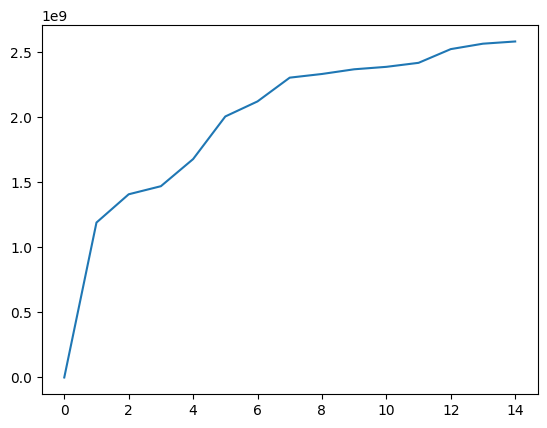

In [61]:
import matplotlib.pyplot as plt
plt.plot(d)

In [70]:
test.head(3)
test.count()

Financial Year
Company      926
Data Type    926
2005         223
2006         230
2007         256
2008         278
2009         280
2010         290
2011         297
2012         290
2013         367
2014         368
2015         371
2016         544
2017         567
2018         590
2019         606
2020         629
dtype: int64

In [62]:
e = []
for i in range(15):    
    temp = test[(test.isna().sum(axis=1) < i)]
    print(i, temp.count()[2020])
    e.append(temp.count()[2020])

0 0
1 94
2 118
3 137
4 153
5 172
6 188
7 210
8 218
9 268
10 288
11 308
12 449
13 502
14 538


In [72]:
tmp = test.drop(columns=["Company","Data Type"])
tmp

Financial Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.750162e+04,2.154699e+04,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.155474e+05,128071.130
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.828500e+04,NaN,NaN,NaN,NaN
3,4.287862e+06,3.431465e+06,4.297651e+06,3.361742e+06,1.154348e+07,1.090192e+07,1.310190e+07,1.208252e+07,9.902410e+06,8.501883e+06,7.730834e+06,7.861236e+06,7.051488e+06,4.211603e+06,7.241184e+06,6770000.000
4,4.431429e+05,7.885836e+05,8.005990e+05,7.505860e+05,8.059971e+05,8.910479e+05,9.003396e+05,9.686485e+05,1.046126e+06,1.153942e+06,1.078864e+06,9.810939e+05,1.011575e+06,8.957133e+05,6.345293e+05,617559.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.214903e+04,1.046108e+05,1.207580e+05,1.309182e+05,112073.784
922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.662943e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.940170e+03,1.150143e+04,7394.091
924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.228082e+05,3.036283e+05,1.670674e+05,5.471226e+04,33819.998


In [25]:
test

Financial Year,Company,Data Type,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,3D Systems Corporation,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.750162e+04,2.154699e+04,NaN,NaN,NaN,NaN,NaN,NaN
1,AAG Energy Holdings Limited,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.155474e+05,128071.130
2,"AJ Networks Co.,Ltd.",C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.828500e+04,NaN,NaN,NaN,NaN
3,APA Corporation,C-absolute-1+2,4.287862e+06,3.431465e+06,4.297651e+06,3.361742e+06,1.154348e+07,1.090192e+07,1.310190e+07,1.208252e+07,9.902410e+06,8.501883e+06,7.730834e+06,7.861236e+06,7.051488e+06,4.211603e+06,7.241184e+06,6770000.000
4,ARC Resources Ltd.,C-absolute-1+2,4.431429e+05,7.885836e+05,8.005990e+05,7.505860e+05,8.059971e+05,8.910479e+05,9.003396e+05,9.686485e+05,1.046126e+06,1.153942e+06,1.078864e+06,9.810939e+05,1.011575e+06,8.957133e+05,6.345293e+05,617559.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,Z Energy Limited,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.214903e+04,1.046108e+05,1.207580e+05,1.309182e+05,112073.784
922,Zhengzhou Coal Mining Machinery Group Company ...,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.662943e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
923,Zhongman Petroleum and Natural Gas Group Corp....,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.940170e+03,1.150143e+04,7394.091
924,Zhongxing Tianheng Energy Technology (Beijing)...,C-absolute-1+2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.228082e+05,3.036283e+05,1.670674e+05,5.471226e+04,33819.998


In [73]:
tmp.loc[0,2013]

17501.617572257353

In [27]:
dct = {}
for j in range(0,926):
    lst = []
    for i in range(2005,2021,1):
        
        if test.loc[j,i] >0:
            
#             print(i)
            lst.append(i)
    dct[j] = lst

dct

{0: [2013, 2014],
 1: [2019, 2020],
 2: [2016],
 3: [2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020],
 4: [2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020],
 5: [2016],
 6: [2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017],
 7: [2016, 2017, 2018, 2019, 2020],
 8: [2013],
 9: [2006, 2007, 2008],
 10: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 11: [2016, 2017],
 12: [2016, 2017, 2018, 2019, 2020],
 13: [2020],
 14: [2009, 2010, 2011, 2012, 2013, 2014],
 15: [2016, 2017, 2018, 2019],
 16: [2005,
  2006,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2018,
  2019,
  2020],
 17: [2005, 2006, 2007, 2015, 2016],
 18: [2016, 2017, 2018, 2019, 2020],
 19: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 20: [2018, 2019, 2020],
 21: [2006],
 22: [2018, 20

In [28]:
df4 = tmp.iloc[:, 5:].dropna()

In [29]:
train, val = df4[:120], df4[120:]

In [30]:
val.shape

(23, 11)

In [95]:
x_train, y_train = train.drop(columns=[2019,2020]), train[[2019,2020]]
x_test, y_test = test.drop(columns=[2019,2020]), test[[2019,2020]]

Financial Year,2019
3,7.241184e+06
4,6.345293e+05
30,7.558620e+05
44,3.002889e+04
63,5.440000e+07
...,...
731,8.856971e+05
744,1.335050e+07
754,2.195893e+06
755,1.073346e+07


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking, Normalization

normalizer = Normalization(input_shape=(9,1))
normalizer.adapt(x_train)

model = Sequential([
    normalizer,
    LSTM(1000,return_sequences=True),
    LSTM(1000),
    Dense(500),
    Dense(50),
    Dense(1, activation="linear")
])

In [81]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.losses import mean_absolute_percentage_error
from tensorflow.keras.optimizers import Adam

es = EarlyStopping(patience=50, restore_best_weights=True)


In [88]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normalizat  (None, 9, 9)             19        
 ion)                                                            
                                                                 
 lstm_16 (LSTM)              (None, 9, 1000)           4040000   
                                                                 
 lstm_17 (LSTM)              (None, 1000)              8004000   
                                                                 
 dense_16 (Dense)            (None, 500)               500500    
                                                                 
 dense_17 (Dense)            (None, 50)                25050     
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                      

In [89]:
model.compile(Adam(learning_rate=0.05), loss=mean_absolute_percentage_error)

In [90]:
import tensorflow as tf
def scheduler(epoch, lr):
    if epoch < 200:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [91]:
lr = LearningRateScheduler(scheduler)

In [92]:
history = model.fit(x=x_train, y=y_train,epochs=10_000, callbacks=[lr, es], validation_split=0.3)

Epoch 1/10000
3/3 [==============================] - 5s 1s/step - loss: 98.6033 - val_loss: 97.6694 - lr: 0.0500
Epoch 2/10000
3/3 [==============================] - 1s 300ms/step - loss: 93.5042 - val_loss: 94.8415 - lr: 0.0500
Epoch 3/10000
3/3 [==============================] - 1s 294ms/step - loss: 96.2134 - val_loss: 96.4448 - lr: 0.0500
Epoch 4/10000
3/3 [==============================] - 1s 290ms/step - loss: 94.6589 - val_loss: 99.4176 - lr: 0.0500
Epoch 5/10000
3/3 [==============================] - 1s 286ms/step - loss: 95.1081 - val_loss: 96.6781 - lr: 0.0500
Epoch 6/10000
3/3 [==============================] - 1s 315ms/step - loss: 95.2939 - val_loss: 95.8647 - lr: 0.0500
Epoch 7/10000
3/3 [==============================] - 1s 330ms/step - loss: 94.6785 - val_loss: 98.2366 - lr: 0.0500
Epoch 8/10000
3/3 [==============================] - 1s 286ms/step - loss: 93.3068 - val_loss: 98.3850 - lr: 0.0500
Epoch 9/10000
3/3 [==============================] - 1s 282ms/step - loss: 